### Fill out:
Name & Surname: Zhen Xue, Gue

Student ID: 33521352

## W1&W2 post studio exercises (revision, kNN)

Enter your solution in the cell(s) below each exercise. Add couple of inline comments explaining your code. Don't forget to answer the questions stated in the exercises in markdown cell. Missing comments (in markdown cells and/or inline) and late submissions will incur penalties.

Once done, drag&drop your python file to your ADS1002-name github account.

Copy url of this file on github to appropriate folder on Moodle by 09.30am prior your next studio. 

Solutions will be released later in the semester.

Max 10 marks - 2.5 marks per each exercise.

For these exercises you will use the `penguins` dataset from seaborn. Load it using load_dataset().

In [93]:
# import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

import warnings
# ignore all warnings
warnings.filterwarnings('ignore')

In [94]:
penguins_df = sns.load_dataset("penguins")

### Exercise 1 (cleaning, plotting)

First, create a numerical code for classification rather than using the string value of `species` (add column named, e.g., `code`). 

We will be using columns `flipper length`, `bill depth`, `species`, `code`; drop rows that have at least one missing value in any of these columns. Hint: dropna() and play around with its parameters such as subset etc.

Next, create:

- a feature array which consists of the `flipper length` and `bill depth` (**show first 5 rows**), 

- a target (i.e., Y or outcome) series which consists of the species `code` (**show first 5 values**),

- and an array which contains unique values of species names (**show all**). 

Also, **plot a scatter plot** of the feature array against the target series (include legend). Hint: Plot flipper length against bill depth and colour according to `target series` - label will have 3 levels: 0,1,2. If you would like scatterplot with species names - use penguins column `species`.)

In [95]:
# Overiew of the dataset
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [96]:
# See what are the species names in `species`.
print(penguins_df['species'].unique())

['Adelie' 'Chinstrap' 'Gentoo']


In [97]:
"""
Requirement 1: Creat Numerical code for classification

Numerical code would be as:
    0 - Adelie
    1 - Chinstrap
    2 - Gentoo
"""
spec_map = {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}

# Then, create the code col using `map` function
penguins_df["code"] = penguins_df["species"].map(spec_map)

In [98]:
"""
Requirement 2: Data cleaning

As we will be using columns `flipper length`, `bill depth`, `species`, `code`
only, we drop the other col, then for the rest leave with non-null values.
"""

# assign the penguins_df itself with filtered df since we dont need it anymore.
penguins_df = penguins_df[["flipper_length_mm", "bill_depth_mm", "species", "code"]]

# then dropna
penguins_df = penguins_df.dropna()

# display first few rows
penguins_df.head()

,flipper_length_mm,bill_depth_mm,species,code
0,181.0,18.7,Adelie,0
1,186.0,17.4,Adelie,0
2,195.0,18.0,Adelie,0
4,193.0,19.3,Adelie,0
5,190.0,20.6,Adelie,0


In [99]:
# we rename the col before going to the next step
rename_map = {
    "flipper_length_mm" : "flipper_length",
    "bill_depth_mm" : "bill_depth"
}

#rename it based on the dict
penguins_df = penguins_df.rename(rename_map)

In [100]:
"""
Requirement 3: Feature array
"""
X = penguins_df.iloc[:, :2]
y = penguins_df['code']

#show first 5 rows
print(f"First 5 rows of X:\n {X[:5]}\n")
print(f"First 5 rows of y:\n {y[:5]}")

First 5 rows of X:
    flipper_length_mm  bill_depth_mm
0              181.0           18.7
1              186.0           17.4
2              195.0           18.0
4              193.0           19.3
5              190.0           20.6

First 5 rows of y:
 0    0
1    0
2    0
4    0
5    0
Name: code, dtype: int64


In [101]:
"""
Requirement 4: show unique values of species names
"""
print(penguins_df[['species', 'code']].drop_duplicates())
print("")
# This could also be done by
print(penguins_df['species'].unique())

       species  code
0       Adelie     0
152  Chinstrap     1
220     Gentoo     2

['Adelie' 'Chinstrap' 'Gentoo']


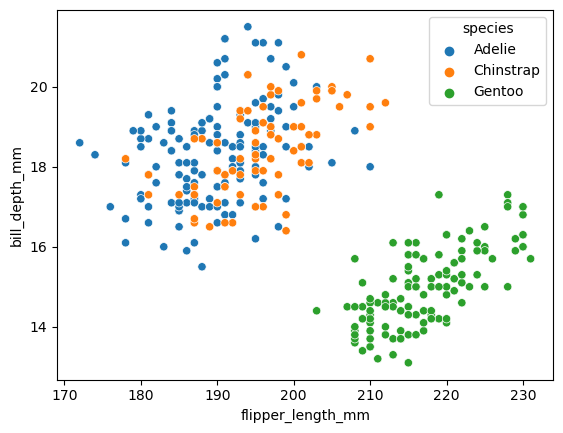

In [102]:
"""
Last requiremnt: plot scatter plot
"""
sns.scatterplot(x='flipper_length_mm', y='bill_depth_mm', hue='species', data=penguins_df); 

### Exercise 2 (kNN - raw data)

Split the data into training and testing set, with and 80:20 split, random state equal to 0. Create a kNN model with 10 nearest neighbours and uniform weights. Train (fit) model on training data. Calculate predictions for feature values in testing set (**show first 5 entries**). **Print accuracy** (import from sklearn.metrics) and **plot confusion matrix** using function from the pre-studio notebook.

In [103]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# create kNN model
knn = KNeighborsClassifier(n_neighbors=10, weights='uniform')
knn.fit(X_train, y_train)

# calc prediction
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7246376811594203


In [104]:
# Confusion matrix plotting method 
def plt_confusion_matrix(cnf_matrix, col, method):
    """
    Given actual target values and predicted values for a classifier 'method', 
    plots the confusion matrix
    """
    # write the confusion matrix to a dataframe with row and column names as the categories
    cmatrix = pd.DataFrame(cnf_matrix,columns=col,index=col) 
    
    f, ax = plt.subplots(figsize=(7,6)) # initialise the plots and axes
    
    sns.heatmap(cmatrix, annot=True, linewidths=.5) # plot the confusion matrix as a heatmap
    
    plt.title('Confusion matrix for ' + method) 
    # add a title, + concatenates two strings
    plt.ylabel('Actual label') # add a ylabel
    plt.xlabel('Predicted label') # add a xlabel
    
    # adjust the bottom and top of the figure, so we can view all of it
    bottom, top = ax.get_ylim()  
    # get the y axis limits
    
    ax.set_ylim(bottom + 0.5, top - 0.5); 
    # adjust the y axis limit

In [105]:
def plt_decision_boundaries(skm,xx,yy):
    """
    Takes a sklearn model (skm) with two features and plots the decision boundaries.
    xx and yy correspond to matrices with the x and y coordinates.
    """
    zz = skm.predict(np.column_stack([xx.ravel(), yy.ravel()]))  
    zz = zz.reshape(xx.shape) # reshape zz so it has the size of the original array xx, i.e., (n,m)
    plt.contourf(xx, yy, zz, cmap=plt.cm.Paired) # plot the decision boundaries as filled contours

In [106]:
#first 5 values
for i in range(5):
    print(f"Predicted entry {i} : {y_pred[i]}")

Predicted entry 0 : 0
Predicted entry 1 : 2
Predicted entry 2 : 1
Predicted entry 3 : 2
Predicted entry 4 : 1


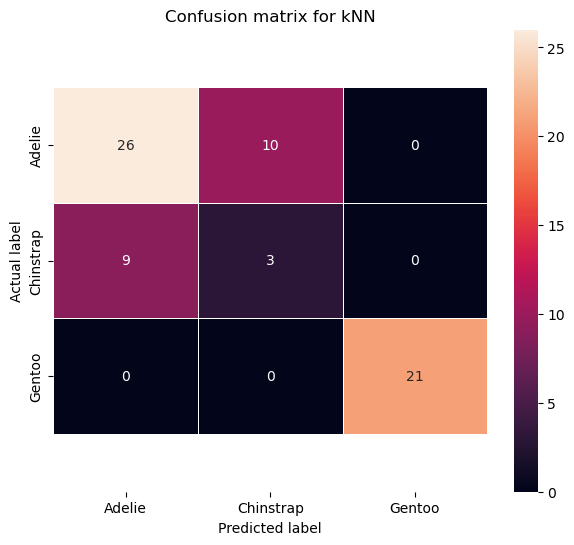

In [107]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cnf_matrix = confusion_matrix(y_test, y_pred) # create a confusion matrix for our actual and predicted values
species = penguins_df['species'].unique()
plt_confusion_matrix(cnf_matrix, species, 'kNN')

In [108]:
#cm could also be printed by
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[26 10  0]
 [ 9  3  0]
 [ 0  0 21]]


### Exercise 3 (normalisation, plotting)

Our features have quite different variance. Let's see, whether accuracy of kNN model can improve by normalising the the feature array. Divide data in feature array by its standard deviation, **show first 5 rows** and **plot scatterplot of flipper length against bill_depth coloured according to code (or species).**

In [109]:
"""
Requirement 1: show first 5 rows 
"""
Xn = X / X.std()

print(Xn[:5])

   flipper_length_mm  bill_depth_mm
0          12.871831       9.469346
1          13.227406       8.811049
2          13.867442       9.114879
4          13.725212       9.773175
5          13.511867      10.431472


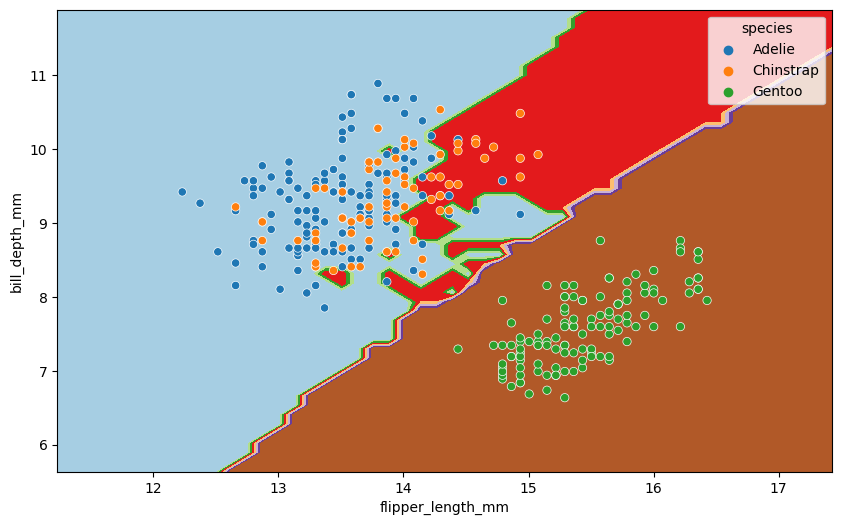

In [110]:
"""
Requirement 2: plot scatterplot
"""

n_neighbours = 10

clf = KNeighborsClassifier(n_neighbours, weights='uniform')
clf.fit(Xn, y)

x_min, x_max = Xn.iloc[:, 0].min() - 1, Xn.iloc[:, 0].max() + 1
y_min, y_max = Xn.iloc[:, 1].min() - 1, Xn.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max),
                     np.linspace(y_min, y_max))

plt.figure(figsize=(10, 6))
plt_decision_boundaries(clf, xx, yy)

# Create scatter plot with seaborn
sns.scatterplot(x=Xn['flipper_length_mm'], y=Xn['bill_depth_mm'], hue=penguins_df["species"]);


### Exercise 4 (kNN - normalised data)

Repeat Ex 2 on normalised data created in Ex 3. **Show accuracy score, plot confusion matrix. Did the accuracy score improve?**

In [111]:
# split data
X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size=0.2, random_state=0)

# create kNN model
knn = KNeighborsClassifier(n_neighbors=10, weights='uniform')
knn.fit(X_train, y_train)

# calc prediction
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7536231884057971


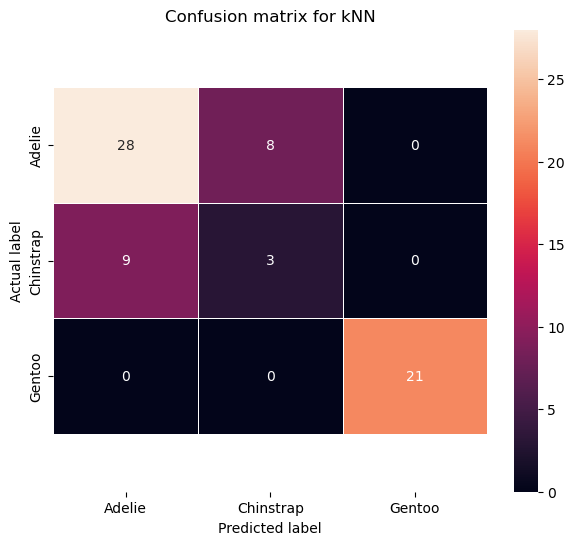

In [112]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cnf_matrix = confusion_matrix(y_test, y_pred) # create a confusion matrix for our actual and predicted values
species = penguins_df['species'].unique()
plt_confusion_matrix(cnf_matrix, species, 'kNN')

Comment:
1. We could see that there's an improvement of accuracy from **0.724** to **0.753**